# Problem Set 4

In [1]:
import numpy as np
import pandas as pd
import random

import sklearn.model_selection as model_selection
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn import linear_model


import matplotlib.pyplot as plt
%matplotlib inline

## Problem A: Import 10000 records from the NYC yellow cab data set
Import 100 records from the NYC yellow cab data set. We're going to be looking at the relationship between trip distance and tip amount. Are passengers fwho travel further tipping better than others?

Our first task is to import and clean the data. Import the first 10000 rows of the Jan 2017 yellow cab NYC trip data into a pandas data frame. Create a view on trip_distance and tip_amount. Plot the trip_distance vs. tip amount in a scatter plot.

The data set can be found here:
<http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml>

,trip_distance,tip_amount
0,3.30,2.00
1,0.90,1.45
2,1.10,1.00
3,1.10,1.70
4,0.02,0.00


Text(0, 0.5, 'Tip Amount ($)')

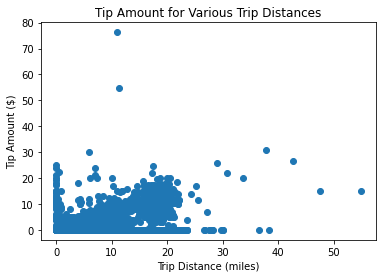

In [4]:
# IMPLEMENT ME (Please make sure you name the dataframe as 'df1' and don't modify 'df1' in later parts.)
# (Read your data from "yellow_tripdata_2017-01.csv".)
df1 = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2017-01.csv', nrows=10000)
#assign a variable to view the header of the data file
sample_df = df1[['trip_distance','tip_amount']]
display(sample_df.head())
#create a scatter plot of the trip_distance and tip_amount
plt.scatter(df1.trip_distance, df1.tip_amount)
#add plot title and axes labels
plt.title('Tip Amount for Various Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')

## Problem B: Remove the people who tipped nothing
People who tipped nothing aren't very useful for our needs. We are interesteded in how much they tipped when they were generous enough to do so. Similarly, we don't care about people that tipped for very short rides. Remove all records where the trip distance was less than 0.5 miles. Create a data frame with the records of zero (or less) tips removed and plot the relationship between the trip distance and the tip amount. Can  the resulting data frame 'df'.

(4402, 17)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
6,2,2017-01-01 00:00:02,2017-01-01 00:39:22,4,7.75,1,N,186,36,1,22.0,0.5,0.5,4.66,0.0,0.3,27.96


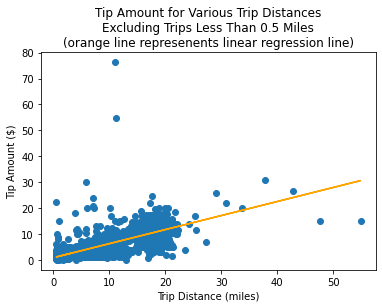

In [5]:
# IMPLEMENT ME (Please make sure you name the dataframe as 'df2' and don't modify 'df2' in later parts.)
#remove the records of data that have tip amounts less than $0 or (which is the | symbol) trips that were less than 0.5 miles
df2 = df1[(df1.tip_amount>0) & (df1.trip_distance>=0.5)] 
print(df2.shape)
#show the first five records of the new dataframe
display(df2.head())
#create a scatter plot of the data and add a linear regression line
plt.scatter(df2.trip_distance, df2.tip_amount)
#Add plot title and axes labels
plt.title('Tip Amount for Various Trip Distances\nExcluding Trips Less Than 0.5 Miles\n(orange line represenents linear regression line)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
#generate coefficients for linear regression line
m, b = np.polyfit(df2.trip_distance, df2.tip_amount, 1)
#plot the linear regression line
plt.plot(df2.trip_distance, m*df2.trip_distance+b, color='orange')

# Problem C: Fit a linear regression to the resulting trip_distance vs. tip_amount data

In [6]:
X = df2['trip_distance'].values.reshape(-1,1)
y = df2['tip_amount']

In [7]:
# IMPLEMENT ME
linreg=LinearRegression(fit_intercept=False)
linreg.fit(X,y)

LinearRegression(fit_intercept=False)

## Problem D: Look at the regression coefficients
Print the regression coefficients (intercept and slope) and in a markdown cell comment about their values. Do they make sense? What do they tell you?

In [8]:
# IMPLEMENT ME (Save the value of intercept as 'a' and the value of slope as 'b'.
# Make sure you only save the value of slope as 'b' instead of an array.)

#save the intercept as a
a = linreg.intercept_
#save the slope
slope = linreg.coef_
#save the value of the slope as b
b = slope[0]
#print the slope and intercept
print('Intercept:', a)
print('Slope:', b)

Intercept: 0.0
Slope: 0.6227420644126486


Both the slope and intercept for the linear regression make sense. The intercept of 0 simply means that the linear regression line intersects the y-axis at a value of 0, and since there are many tip amounts around 0, we should expect the intercept to be somewhere around this value. The positive value of the slope means that there is a positive relationship between the trip distance and the tip amount. In other words, longer trips typically mean larger tips for the taxi drive, at least in these records. From the scatterplot in Problem B, it appears that this is true because on average, increasing the trip distance also increases the tip amount. 

## Problem E: Evaluate the model
Just because the model fit the data set doesn't mean it's very predictive. Run a 10-fold cross-validation and compute the average mean absolute deviation. Show the result. In a markdown cell comment on what that number means in terms of predictive accuracy.

In [9]:
random.seed(5)
# IMPLEMENT ME (Save the computed average mean absolute deviation as 'c'.)
scores = cross_validate(linreg, X, y, cv=10, scoring='neg_mean_absolute_error', return_train_score=False)
scores

{'fit_time': array([0.00374103, 0.00242567, 0.00268793, 0.00183177, 0.00725102,
        0.00219011, 0.00250196, 0.00149417, 0.00119901, 0.00092292]),
 'score_time': array([0.00120306, 0.00095415, 0.00074887, 0.00066829, 0.00102973,
        0.00085402, 0.00095296, 0.00049996, 0.00041389, 0.00054002]),
 'test_score': array([-1.21759056, -1.32441453, -1.1982527 , -1.13831936, -1.29449843,
        -1.10432772, -1.240895  , -1.16675271, -1.0800301 , -0.97469451])}

In [11]:
# get average of the mean absolute deviation scores for 10-fold cross-validation
average_deviation = np.mean(-1*scores['test_score'])
print('Average Mean Absolute Deviation:', average_deviation)

Average Mean Absolute Deviation: 1.1739775607052036


The mean absolute error is a metric used to evaluate the predictive performance of a model, in this case linear regression. This value represents the absolute difference between the predicted values and the true values. Since we are trying to predict the tip amount from the trip distance, this error is how far off the predicted tip amount is from the true tip amount. So, on average, the predicted tip amount is off by \\$1.17. In my opinion, this model is rather good at predicting this value, but we would have to confirm this on a validation set of data to endure the model is not overfitting on the training data. By looking at the scatter plot of the trip distances and tip amounts, most of the tip amounts fall within the range of \\$0-\\$20, so if the error is only \\$1.17 on average, I would say that this model is good at predicting. In terms of trying to get better tips based on trip distance, and the given the current day value of the US dollar, I do not think that \\$1.17 is a bad error at all. In terms of a taxi cab driver, if he uses this model to estimate how much of a tip he will get, he may be off by this error amount.